# UCI Machine Learning Repository: Bike Sharing Dataset

## Dataset Information

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

## Model Building: Logistic Regression

### Objective 1:
Using this dataset, we are interested in building a logistic regression model, based on the length of kernel and the length of kernel groove.

### Objective 2:
Build a confusion matrix for the logistic regression model

### Objective 3:
As features in this dataset are not on the same scale, we can perform the standard scaler or min-max scaler on both the training and the test sets. In this case, we will train a standard scaler and a min-max scaler from the original training set. Next, we will visualize the change of training error and test error in response to the change of complexity trade-off parameter C

## Objective 1

### 1.0 Building a Logistic Regression Model

Based on our dataset, we will attempt to build a logistic regression model on two variables 'length of kernel' and 'length of kernel groove'. First, we will load the required packages and read our dataset.

### 1.1 Loading Packages and Reading Dataset

In [1]:
import os

os.chdir("C:/Users/Samuel/Desktop/SMU MITB/Sem 3/ISSS610-Applied Machine Learning/Assignment 1/dataset")

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics, preprocessing
import matplotlib.pyplot as plt

seeds = pd.read_csv('seeds_dataset.txt', delimiter='\t', header = None)
num_row, num_col = seeds.shape

### 1.2 Data Pre-Processing

Prior to building our model, we want to first obtain a basic summary of our dataset and to perform basic data exploration.

#### 1.2.1 Data Summary

In [3]:
seeds.head(5)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


#### 1.2.2 Checking for Missing Values

In [4]:
missing_value_count_row = {}
for i in range(num_row):
    value_count = seeds.iloc[i,:].value_counts()
    missing_count = 0
    if '?' in value_count:
        missing_count = value_count['?']
    if missing_count in missing_value_count_row:
        missing_value_count_row[missing_count].append(i)
    else:
        missing_value_count_row[missing_count] = [i]

for missing_count, row_list in missing_value_count_row.items():
    print('there are', missing_count * len(row_list), 'missing values in', len(row_list), 'out of', num_row, 'rows.')
    
missing_value_count_col = {}
for j in range(num_col):
    value_count = seeds.iloc[:,j].value_counts()
    missing_count = 0
    if '?' in value_count:
        missing_count = value_count['?']
    if missing_count in missing_value_count_col:
        missing_value_count_col[missing_count].append(j)
    else:
        missing_value_count_col[missing_count] = [j]

for missing_count, col_list in missing_value_count_col.items():
    print('there are', missing_count * len(col_list), 'missing values in', len(col_list), 'out of', num_col, 'columns.')

there are 0 missing values in 210 out of 210 rows.
there are 0 missing values in 8 out of 8 columns.


### 1.3 Setting Train and Test Data

Once we have performed tha basic data exploration, we will now set our train and test dataset to builid our logistic regression model.

In [5]:
seeds = np.asarray(seeds) #Changing seeds from pd.DataFrame to np.array

np.random.seed(2018)
train = np.random.choice([True, False], num_row, replace=True, p=[0.5,0.5])
x_train = seeds[train,:-1][:,[3,6]]
y_train = seeds[train,-1].astype(int)
x_test = seeds[~train,:-1][:,[3,6]]
y_test = seeds[~train,-1].astype(int)

### 1.4 Defining Logistic Regression Model with C = 10 and Multiclass = 'ovr'

With our train and test dataset, we will now build our logistic regression model.

In [6]:
logit = linear_model.LogisticRegression(C = 10, multi_class = 'ovr')
logit.fit(x_train, y_train)

C:\Users\Samuel\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### 1.5 Visualizing the Three Classifiers
With our Logistic Regression model built, we will visualize both chosen variables, 'Length of Kernel' and 'Length of Kernel Groove', against the three classifiers, 'Kama', 'Rosa' and 'Canadian'.

'Kama', 'Rosa' and 'Canadian' are represented with the colours 'Red', 'Green' and 'Blue' respectively.

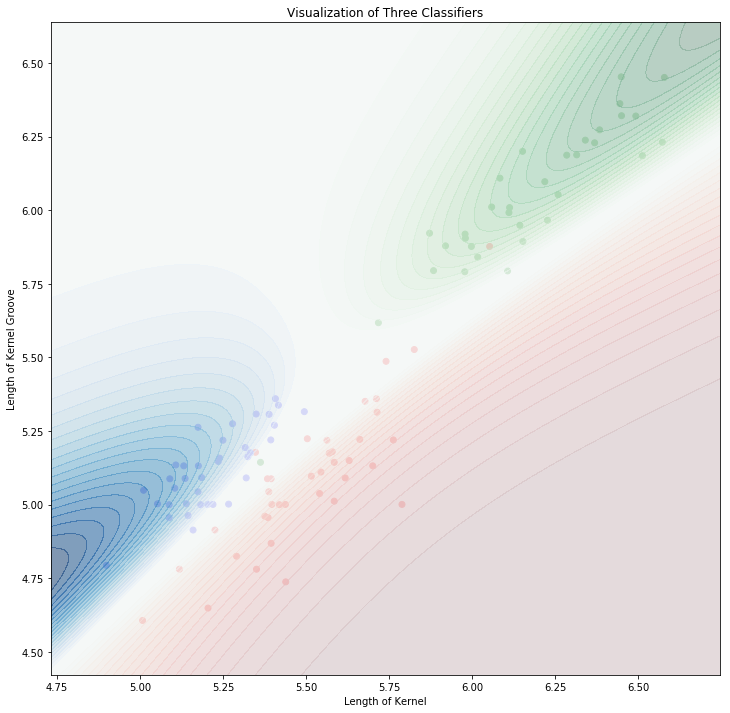

In [7]:
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200

x0 = my_linspace(min(x_test[:,0]), max(x_test[:,0]), steps)
x1 = my_linspace(min(x_test[:,1]), max(x_test[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_proba = logit.predict_proba(mesh_data).reshape(steps, steps, 3)

color = ['red', 'green', 'blue']
y_color = [color[i-1] for i in y_test]

contour_color = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]
plt.figure(figsize=(12, 12))
plt.scatter(x_test[:,0], x_test[:,1], c=y_color)

for i in range(3):
    plt.contourf(xx0, xx1, np.maximum(mesh_proba[:,:,i], 0.5), 20, cmap=contour_color[i], alpha=0.5)

plt.xlabel("Length of Kernel")
plt.ylabel("Length of Kernel Groove")
plt.title("Visualization of Three Classifiers")
plt.show()

## Objective 2

### 2.0 Calculating the Score of Logistic Regression Model
In objective 2, we will attempt to calculate the score of our logistic regression model.

### 2.1 Determining the Size of the Test Set

In [8]:
print("The size of test set: ", x_test.shape)

The size of test set:  (107, 2)


### 2.2 Building a Confusion Matrix for the Logistic Regression Model

#### 2.2.1 The confusion matrix is calculated in the format below:

In [9]:
class ListTable(list):       
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

y_pred = logit.predict(x_test)

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
    
confusion_mat_ind = np.asarray([["Actual Class = 1"],
                    ["Actual Class = 2"],
                    ["Actual Class = 3"]])

confusion_mat_disp = np.hstack((confusion_mat_ind, confusion_mat))
    
table = ListTable()
table.append(["", "Predicted Class = 1", "Predicted Class = 2", "Predicted Class = 3"])
for i in range(3):
    table.append(confusion_mat_disp[i])

table

,Predicted Class = 1,Predicted Class = 2,Predicted Class = 3
Actual Class = 1,35,2,1
Actual Class = 2,0,32,1
Actual Class = 3,1,0,35


### 2.3 What is the Score of the Logistic Regression Model?

In [10]:
score = logit.score(x_test, y_test)
print("The score of the logistic regression model: ", score)

The score of the logistic regression model:  0.9532710280373832


### 2.4 What is the Score Function for Logistic Regression?

The score function for logistic regression is the accuracy rate, which identifies the proportion of correct predictions / classification. To confirm this, we will manually calculate the accuracy rate based on the confusion matrix table above and compare the results with the logistic regression score calculated using the scikit learn score function.

The formula for calculating accuracy rate based on the confusion matrix above is:
(Correct Classification / All)

In [11]:
accuracy_rate = (35+32+35) / (35+0+1+2+32+0+1+1+35)

print("The accuracy rate is: ", accuracy_rate, '\n')

print("The manual calculation of accuracy rate equals to the logistic regression score:" , accuracy_rate == score) 

The accuracy rate is:  0.9532710280373832 

The manual calculation of accuracy rate equals to the logistic regression score: True


## Objective 3

### 3.0 Visualizing the Change of Training Error and Test Error in Response to Change of Complexity Trade-off Parameter C for the Original Dataset, Standard Scaled Dataset and Min-max Scaled Dataset

Since the features in the dataset are not on the same scale, we will perform two sets of scaling and compare the change of training error and test error for each datasets as shown below:

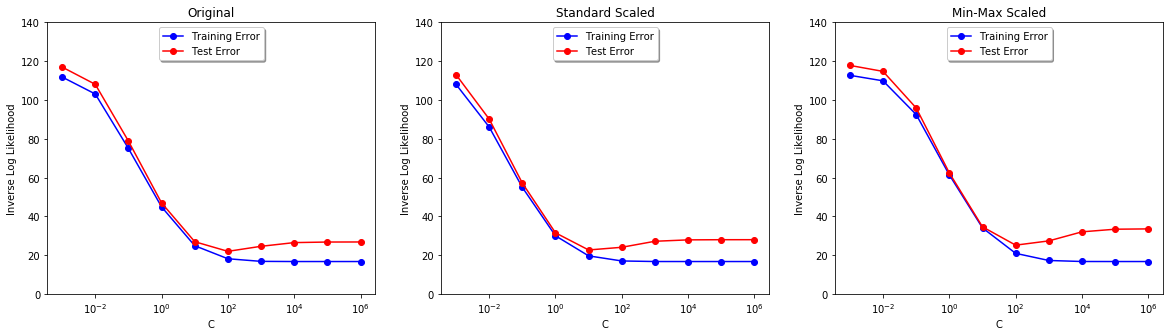

In [12]:
x_train = seeds[train,:-1][:,[3,6]]
y_train = seeds[train,-1].astype(int)
x_test = seeds[~train,:-1][:,[3,6]]
y_test = seeds[~train,-1].astype(int)

standard_scaler = preprocessing.StandardScaler()
x_train_stand = standard_scaler.fit_transform(x_train)
x_test_stand = standard_scaler.fit_transform(x_test)

min_max_scaler = preprocessing.MinMaxScaler()
x_train_min_max = min_max_scaler.fit_transform(x_train)
x_test_min_max = min_max_scaler.fit_transform(x_test)

C = []
for i in range(10):
    C_result = [10 ** (i-3)]
    for result in C_result:
        C.append(result)

invloglike_train_ori_final = []
invloglike_test_ori_final = []
invloglike_train_stand_final = []
invloglike_test_stand_final = []
invloglike_train_min_max_final = []
invloglike_test_min_max_final = []

for c in C:
    logit_original = linear_model.LogisticRegression(C = c, multi_class = 'multinomial', solver = 'newton-cg')
    logit_original.fit(x_train, y_train)
    logit_stand = linear_model.LogisticRegression(C = c, multi_class = 'multinomial', solver = 'newton-cg')
    logit_stand.fit(x_train_stand, y_train)
    logit_min_max = linear_model.LogisticRegression(C = c, multi_class = 'multinomial', solver = 'newton-cg')
    logit_min_max.fit(x_train_min_max, y_train)
    
    
    x_train_proba_ori_final = []
    x_train_proba_ori = logit_original.predict_proba(x_train)
    for num_row in range(len(x_train_proba_ori)):
        x_train_proba_ori_result = [x_train_proba_ori[num_row, (y_train[num_row] - 1)]]
        for result in x_train_proba_ori_result:
            x_train_proba_ori_final.append(result)
    x_train_proba_stand_final = []
    x_train_proba_stand = logit_stand.predict_proba(x_train_stand)
    for num_row in range(len(x_train_proba_stand)):
        x_train_proba_stand_result = [x_train_proba_stand[num_row, (y_train[num_row] - 1)]]
        for result in x_train_proba_stand_result:
            x_train_proba_stand_final.append(result)
    x_train_proba_min_max_final = []
    x_train_proba_min_max = logit_min_max.predict_proba(x_train_min_max)
    for num_row in range(len(x_train_proba_min_max)):
        x_train_proba_min_max_result = [x_train_proba_min_max[num_row, (y_train[num_row] - 1)]]
        for result in x_train_proba_min_max_result:
            x_train_proba_min_max_final.append(result)

    
    invloglike_train_ori = [-sum(np.log(x_train_proba_ori_final))]
    for result in invloglike_train_ori:
        invloglike_train_ori_final.append(result)
    invloglike_train_stand = [-sum(np.log(x_train_proba_stand_final))]
    for result in invloglike_train_stand:
        invloglike_train_stand_final.append(result)
    invloglike_train_min_max = [-sum(np.log(x_train_proba_min_max_final))]
    for result in invloglike_train_min_max:
        invloglike_train_min_max_final.append(result)

        
    x_test_proba_ori_final = []
    x_test_proba_ori = logit_original.predict_proba(x_test)
    for num_row in range(len(x_test_proba_ori)):
        x_test_proba_ori_result = [x_test_proba_ori[num_row, (y_test[num_row] - 1)]]
        for result in x_test_proba_ori_result:
            x_test_proba_ori_final.append(result)
    x_test_proba_stand_final = []
    x_test_proba_stand = logit_stand.predict_proba(x_test_stand)
    for num_row in range(len(x_test_proba_stand)):
        x_test_proba_stand_result = [x_test_proba_stand[num_row, (y_test[num_row] - 1)]]
        for result in x_test_proba_stand_result:
            x_test_proba_stand_final.append(result)
    x_test_proba_min_max_final = []
    x_test_proba_min_max = logit_min_max.predict_proba(x_test_min_max)
    for num_row in range(len(x_test_proba_min_max)):
        x_test_proba_min_max_result = [x_test_proba_min_max[num_row, (y_test[num_row] - 1)]]
        for result in x_test_proba_min_max_result:
            x_test_proba_min_max_final.append(result)
    
    
    invloglike_test_ori = [-sum(np.log(x_test_proba_ori_final))]
    for result in invloglike_test_ori:
        invloglike_test_ori_final.append(result)
    invloglike_test_stand = [-sum(np.log(x_test_proba_stand_final))]
    for result in invloglike_test_stand:
        invloglike_test_stand_final.append(result)
    invloglike_test_min_max = [-sum(np.log(x_test_proba_min_max_final))]
    for result in invloglike_test_min_max:
        invloglike_test_min_max_final.append(result)

invloglike_train_all = [invloglike_train_ori_final, invloglike_train_stand_final, invloglike_train_min_max_final]
invloglike_test_all = [invloglike_test_ori_final, invloglike_test_stand_final, invloglike_test_min_max_final]

plt.figure(figsize = (20,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.xscale('log')
    plt.ylim([0,140])
    plt.xlabel("C")
    plt.ylabel("Inverse Log Likelihood")
    plt.plot(C, invloglike_train_all[i], 'bo-', C, invloglike_test_all[i], 'ro-')
    plt.legend(('Training Error', 'Test Error'),
           loc='upper center', shadow=True)
    if i == 0:
        plt.title("Original")
    if i == 1:
        plt.title("Standard Scaled")
    if i == 2:
        plt.title("Min-Max Scaled")
plt.show()

### 3.1 Discussion on Visualization

Since C is equals to 1/lambda, where a high value of lambda contributes the underfitting of the model, C is the inverse of lambda. For a high value of C, the regularization power of the model decreases, which thus leads to a higher complexity of the model, which will thus lead to the overfitting of the data.

Therefore, this explanation is observed in the above graphs, where we can see that as C increases, the regularization power of the model decreases. The training error curves decreased rapidly initially as C increases, before plateauing when C = (10 ** 2). Conversely, the test error curves decreased rapidly initially, but instead of pleateauing off as C increases further, the test error curves started to increase slightly. As complexity increases when C increases, the model tends to overfit the data, which caused the error on the test data to increase as well. 

However, as the model was built on two chosen variables instead of all seven variables in the original dataset, the overfitting of the model is not as much as it would have been, if all seven variables have been used to build the model.